In [9]:
import numpy as np
import gym
from collections import deque
from tqdm import tqdm

# Agents
from CarRacingAgents import CarRacingAgent03

# Plots
from CarRacingPlots import plot_performance

In [15]:
# Load Agent

agent_name = 'agent_03__800'

agent_norris = CarRacingAgent03(epsilon=0)
agent_norris.load(f'trained_agents/{agent_name}.h5')

agent_norris_performance = np.load(f'trained_agents/{agent_name}.npy')

C:\Users\carlo\AppData\Roaming\Python\Python39\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


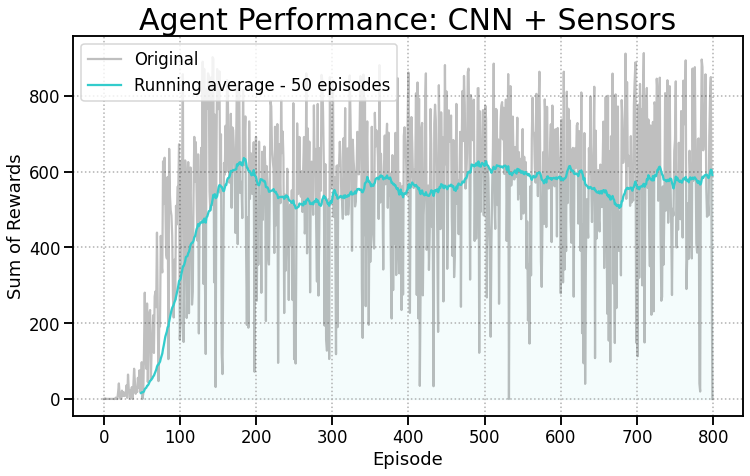

In [16]:
plot_performance(agent_norris_performance, title = 'Agent Performance: CNN + Sensors')

In [10]:
# Set agent to tets
agent = agent_norris
agent.epsilon = 0 # Set epsilon to 0

render = True
seed_nums = [32, 45, 46, 83, 123, 934, 563, 1023, 27546, 32450]
time_steps = 1000

scores = []
env = gym.make('CarRacing-v1', continuous=False)

for e, seed_num in tqdm(enumerate(seed_nums)):
    init_state = env.reset(seed=seed_num)
    init_state = agent.process_state_image(init_state, env)

    total_reward = 0
    punishment_counter = 0
    state_frame_stack_queue = deque([init_state]*agent.frame_stack_num, maxlen=agent.frame_stack_num)
    
    for i in range(time_steps):
        
        if render:
            env.render()

        current_state_frame_stack = agent.generate_state_frame_stack_from_queue(state_frame_stack_queue)
        action = agent.act(current_state_frame_stack)
        next_state, reward, done, info = env.step(action)

        total_reward += reward

        next_state = agent.process_state_image(next_state, env)
        state_frame_stack_queue.append(next_state)

        if done:
            print(f'Reward: {round(total_reward,2)}')
            scores.append(round(total_reward,2))
            break

if render:
    env.close()

print(f"Results: {scores}. \n Avg: {np.mean(scores)}")

1it [03:51, 231.04s/it]

Reward: 859.32


2it [07:27, 222.31s/it]

Reward: 616.56


3it [11:02, 219.20s/it]

Reward: 857.52


4it [14:34, 216.34s/it]

Reward: 881.82


5it [18:11, 216.69s/it]

Reward: 732.3


6it [21:45, 215.49s/it]

Reward: 508.7


7it [25:17, 214.46s/it]

Reward: 753.57


8it [28:52, 214.67s/it]

Reward: 301.27


9it [32:25, 214.26s/it]

Reward: 888.68


10it [35:58, 215.90s/it]

Reward: 857.14
Results: [859.32, 616.56, 857.52, 881.82, 732.3, 508.7, 753.57, 301.27, 888.68, 857.14]. 
 Avg: 725.6880000000001
